<a href="https://colab.research.google.com/github/das109/lecture/blob/main/%EC%9D%B8%EB%8F%84%EC%97%90_%EB%A7%8E%EC%9D%B4_%EC%88%98%EC%B6%9C%EB%90%98%EB%8A%94_%EB%AC%BC%ED%92%88_%EC%95%8C%EC%95%84%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,840 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## 런타임 다시 시작  
데이터 다운로드

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '/content/drive/MyDrive/data/csv_tb_gi_ptin_s.csv'
df = pd.read_csv(file_path, encoding='cp949')

print(df.shape)
print("------------------------------------")
print(df.info())

(999976, 6)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999976 entries, 0 to 999975
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   일련번호     999976 non-null  int64  
 1   수출국가명    999976 non-null  object 
 2   HS코드     999976 non-null  int64  
 3   도착년월     999976 non-null  int64  
 4   인도무역총중량  999976 non-null  float64
 5   도착항구명    999976 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.8+ MB
None


In [3]:
df.head()

,일련번호,수출국가명,HS코드,도착년월,인도무역총중량,도착항구명
0,0,CHINA,680422,202004,1200.0,Delhi TKD ICD
1,1,CHINA,680422,202004,400.0,Delhi TKD ICD
2,2,CHINA,600192,202004,5358.3,Delhi TKD ICD
3,3,CHINA,630790,202004,104.0,Delhi Air
4,4,CHINA,611599,202004,15360.0,Piyala ICD


In [4]:
#데이터의 총 개수 999976
print(df.columns)
print("------------------------------------")
print(df.index)
print(len(df))

Index(['일련번호', '수출국가명', 'HS코드', '도착년월', '인도무역총중량', '도착항구명'], dtype='object')
------------------------------------
RangeIndex(start=0, stop=999976, step=1)
999976


In [5]:
from datetime import datetime


df['일련번호'] = df['일련번호'].astype(str)
df['HS코드'] = df['HS코드'].astype(str)

df['도착년월']= df['도착년월'].astype('str')
df['도착년월'] = df['도착년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

df['수출국가명'] = df['수출국가명'].str.upper()
df['수출국가명'] = df['수출국가명'].replace('UNITED STATES OF AMERICA', 'UNITED STATES')
print(df.describe())

            인도무역총중량
count  9.999760e+05
mean   1.118746e+04
std    2.283778e+05
min    0.000000e+00
25%    1.260000e+00
50%    1.000000e+01
75%    2.000000e+02
max    4.686000e+07


In [6]:
print(len(df['수출국가명'].unique())) # 수출국가의 개수
print(len(df['HS코드'].unique())) # HS코드의 개수
print(len(df['도착항구명'].unique())) # 도착항구의 개수

175
3388
186


# **인도로 가장 많이 수출하는 국가는 어디일까? (Top 10 구하기)**

In [7]:
# 가장 많이 수출한 국가 : top 10을 출력

country_count = df['수출국가명'].value_counts()[:10]
for idx, (val, cnt) in enumerate(country_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : CHINA 331903
Top 2 : GERMANY 110943
Top 3 : UNITED STATES 99287
Top 4 : JAPAN 64141
Top 5 : INDIA 56917
Top 6 : ITALY 39054
Top 7 : UNITED KINGDOM 28724
Top 8 : THAILAND 28682
Top 9 : SINGAPORE 27972
Top 10 : TAIWAN 19815


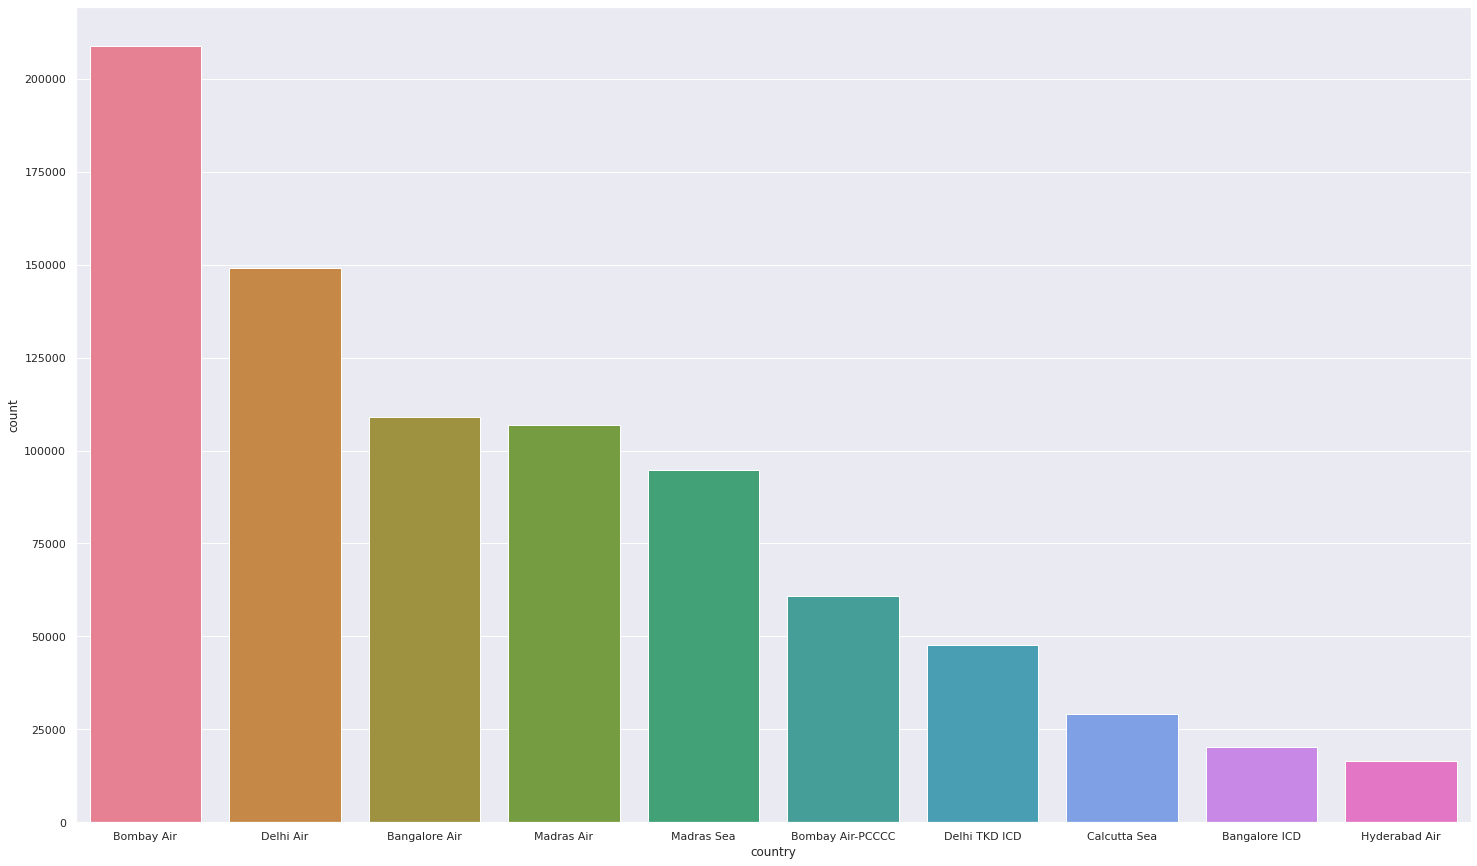

In [8]:
country_count = df['도착항구명'].value_counts()[:10].reset_index(name='rank')
country_count.columns = ['country', 'count']
sns.set(rc = {'figure.figsize':(25,15)})
sns.barplot(x=country_count['country'], y=country_count['count'], palette="husl")

# **가장 많이 이용하는 항구는 어디일까? (Top 10 구하기)**

In [9]:
# 가장 많이 이용한 도착항구 : top 10을 출력

country_count = df['도착항구명'].value_counts()[:10]
for idx, (val, cnt) in enumerate(country_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Bombay Air 208880
Top 2 : Delhi Air 149201
Top 3 : Bangalore Air 108947
Top 4 : Madras Air 106897
Top 5 : Madras Sea 94862
Top 6 : Bombay Air-PCCCC 60807
Top 7 : Delhi TKD ICD 47569
Top 8 : Calcutta Sea 29085
Top 9 : Bangalore ICD 20315
Top 10 : Hyderabad Air 16609


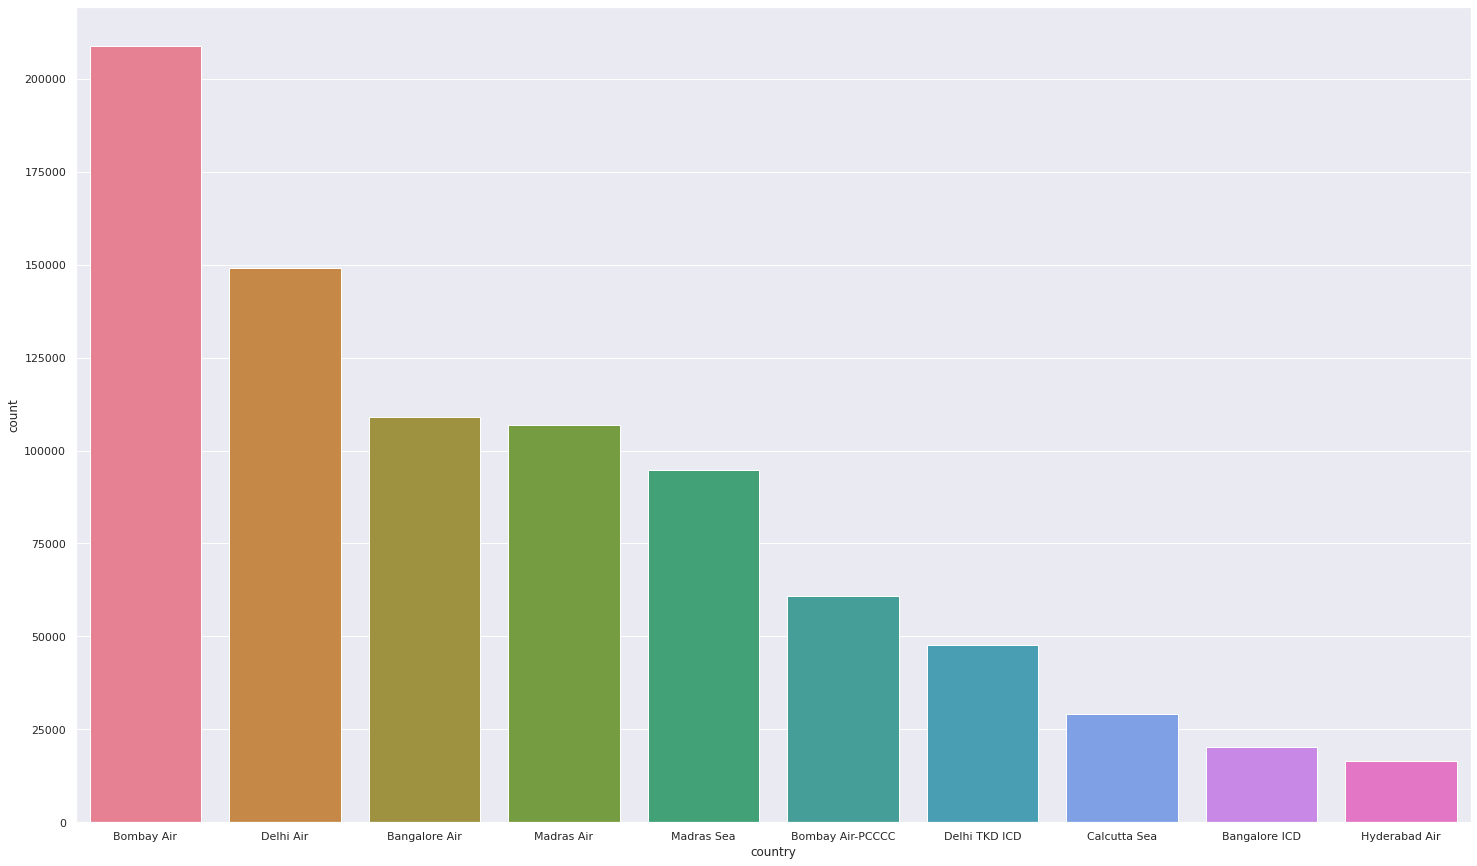

In [10]:
country_count = df['도착항구명'].value_counts()[:10].reset_index(name='rank')
country_count.columns = ['country', 'count']
sns.set(rc = {'figure.figsize':(25,15)})
sns.barplot(x=country_count['country'], y=country_count['count'], palette="husl")

# **인도로 가장 많이 수출하는 물품 구하기**

In [11]:
# 공공데이터포털에서 관세청이 제공하는 HS부호 관련 csv 다운로드

file_path = '/content/drive/MyDrive/data/관세청_HS부호_20220101.csv'
hs_df = pd.read_csv(file_path, encoding='cp949')

hs_df.head()

,HS부호,적용시작일자,적용종료일자,한글품목명,영문품목명,한국표준무역분류명,수량단위최대단가,중량단위최대단가,수량단위코드,중량단위코드,수출성질코드,수입성질코드,품목규격명,필수규격명,참고규격명,규격설명,규격사항내용,성질통합분류코드,성질통합분류코드명
0,101211000,2013-01-01,2022-12-31,농가 사육용,For farm breeding,NaN,NaN,NaN,U,KG,11Z01,12399,NaN,NaN,NaN,NaN,NaN,11020101.0,(말)
1,101219000,2012-01-01,2022-12-31,기타,Other,NaN,NaN,NaN,U,KG,11Z01,12399,NaN,NaN,NaN,NaN,NaN,11020101.0,(말)
2,101291000,2012-01-01,2022-12-31,경주말,Horses for racing,NaN,NaN,NaN,U,KG,11Z01,12399,NaN,NaN,NaN,NaN,NaN,11020101.0,(말)
3,101299000,2012-01-01,2022-12-31,기타,Other,NaN,NaN,NaN,U,KG,11Z01,12399,NaN,NaN,NaN,NaN,NaN,11020101.0,(말)
4,101300000,2022-01-01,2022-12-31,당나귀,Asses,NaN,NaN,NaN,U,KG,11Z01,12399,NaN,NaN,NaN,NaN,NaN,11020190.0,(기타 산 동물)


In [12]:
hs = hs_df[['HS부호', '성질통합분류코드명']]
hs = hs.dropna(subset = ['성질통합분류코드명'])

hs['HS부호'] = hs['HS부호'].astype(str)
hs['HS부호'] = hs['HS부호'].apply(lambda x:x[0:6]) 
hs['성질통합분류코드명'] = hs['성질통합분류코드명'].astype(str)
hs['성질통합분류코드명'] = hs['성질통합분류코드명'].apply(lambda x:x[1:-1]) 
hs = hs.drop_duplicates(subset='HS부호', keep='first')

hs

,HS부호,성질통합분류코드명
0,101211,말
1,101219,말
2,101291,말
3,101299,말
4,101300,기타 산 동물
...,...,...
12419,970529,수집품 및 골동품
12420,970531,수집품 및 골동품
12421,970539,수집품 및 골동품
12422,970610,수집품 및 골동품


In [13]:
# 가장 많이 수출한 HS코드물품 : top 10을 출력
country_count = df['HS코드'].value_counts()[:20]
rows = []
for idx, (val, cnt) in enumerate(country_count.iteritems(), 1):
    correct_tmp = hs.loc[hs['HS부호'] == val]
    if correct_tmp.empty:
      continue
    rows.append([idx, correct_tmp['성질통합분류코드명'].values[0], cnt])
    print("Top", idx, ":", val, correct_tmp['성질통합분류코드명'].values[0], cnt)

Top 1 : 401693 원료용 고무제품 79030
Top 2 : 710239 다이아몬드 55772
Top 3 : 392690 기타 일반기계 부품 22135
Top 4 : 847130 컴퓨터 20314
Top 5 : 870899 자동차 부품 18138
Top 7 : 851762 유선통신기기 17814
Top 9 : 848210 베어링 12329
Top 10 : 950300 완구류 11449
Top 11 : 852990 평판디스플레이 부품 11041
Top 12 : 853890 기타 IT부품 10885
Top 13 : 847330 정보기기 부품 10688
Top 14 : 853690 기타 IT부품 10175
Top 15 : 854231 시스템반도체 10150
Top 16 : 871410 기타 수송장비 부품 9689
Top 17 : 850440 변환기 9342
Top 18 : 731815 볼트 및 너트 8312
Top 19 : 854239 기타 집적회로반도체 8060
Top 20 : 848180 밸브 7996


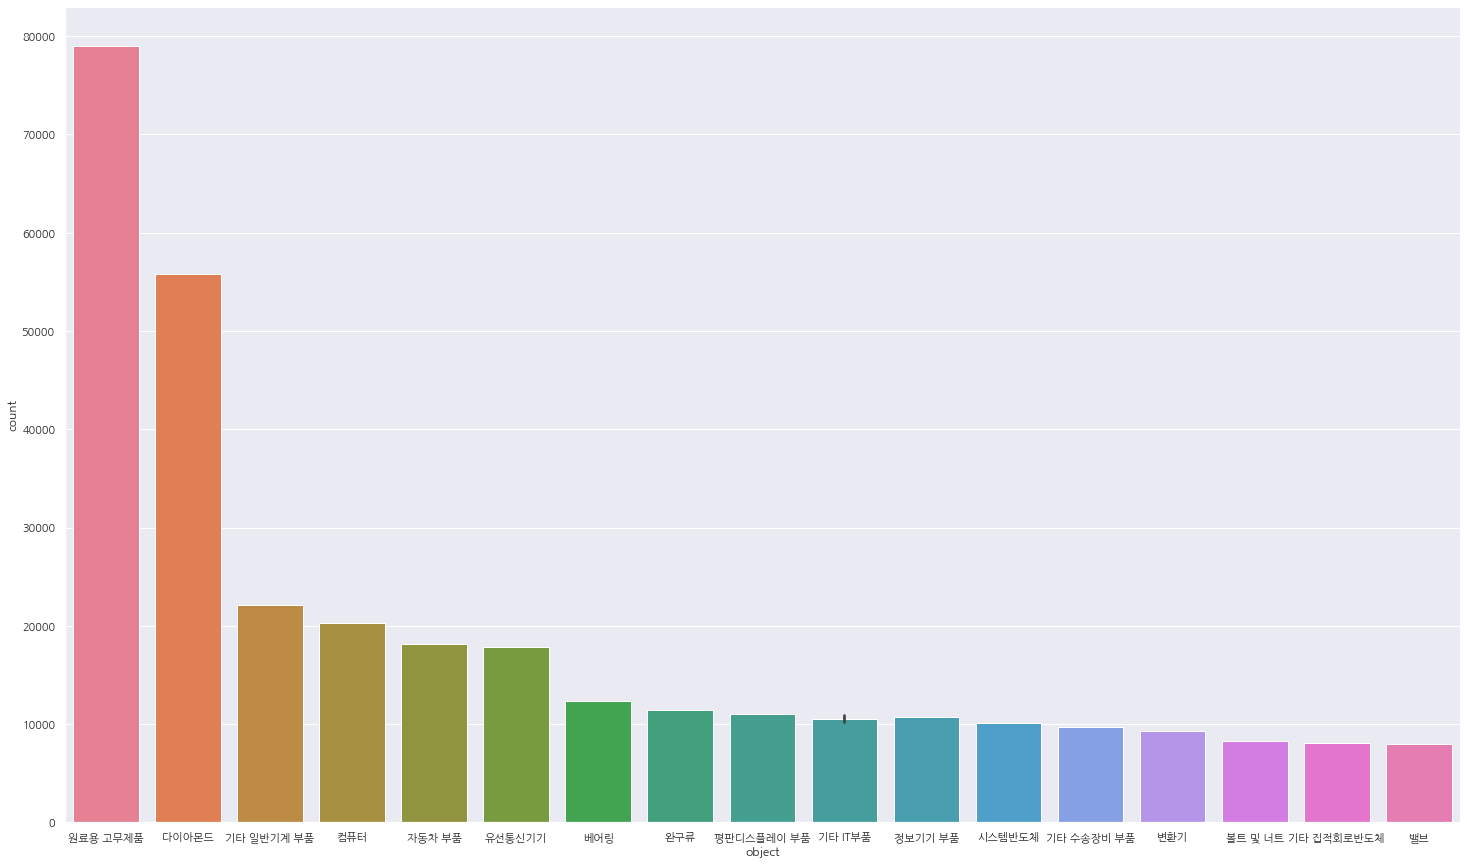

In [14]:
country_count = pd.DataFrame(rows, columns=["rank", "object", "count"])
sns.set(rc = {'figure.figsize':(25,15)})
plt.rc('font', family='NanumGothic')

sns.barplot(x=country_count['object'], y=country_count['count'], palette="husl")

In [15]:
country_hs_count = df.groupby('수출국가명')['HS코드'].count().reset_index(name='rank')
country_hs_count.columns = ['country', 'count']

country_hs_count = country_hs_count[country_hs_count['count']>=1000]
country_hs_count

,country,count
6,AUSTRALIA,1745
7,AUSTRIA,10433
10,BANGLADESH,5269
13,BELGIUM,6990
20,BRAZIL,3052
26,CANADA,2628
29,CHINA,331903
38,CZECH REPUBLIC,4583
39,DENMARK,4531
49,FINLAND,2608


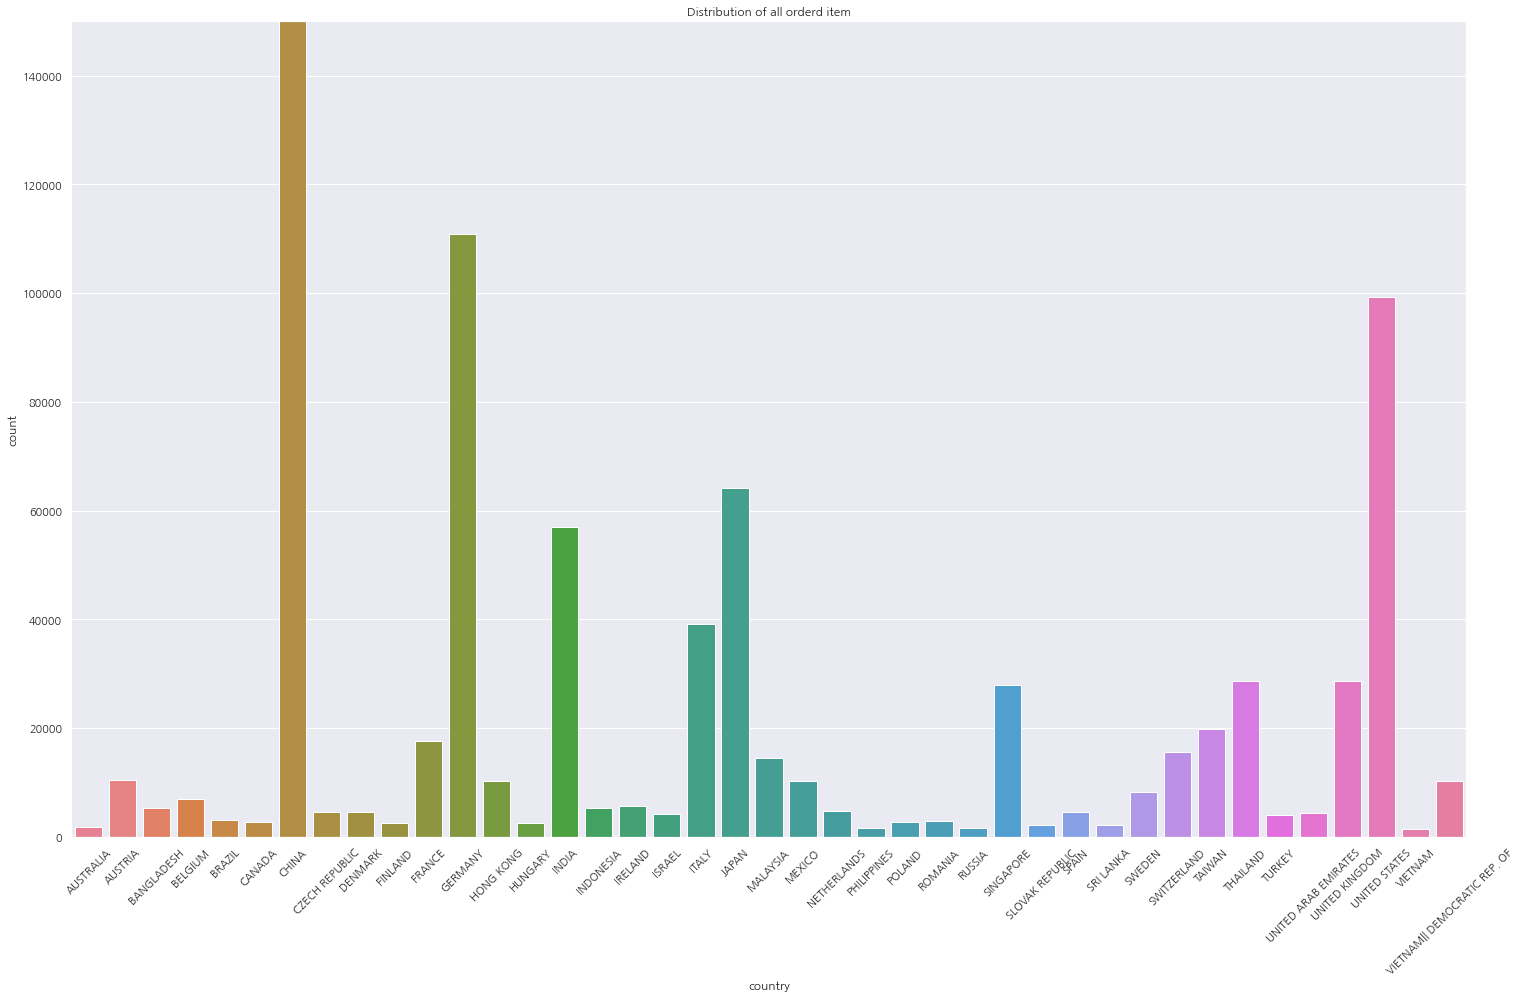

In [16]:
sns.set(rc = {'figure.figsize':(25,15)})
plt.rc('font', family='NanumGothic')
plt.ylim(0, 150000)
#sns.histplot(x=country_count['country'], y=country_count['count'])
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
plt.xticks(rotation=45)

sns.barplot(x=country_hs_count['country'], y=country_hs_count['count'], palette="husl")

#프로그램 제작

In [17]:
country_hs_count = df.groupby(['HS코드', '수출국가명'])['일련번호'].count().reset_index(name='count').sort_values(['count'], ascending=False)
hs.rename(columns = {'HS부호' : 'HS코드'}, inplace = True)
result = pd.merge(country_hs_count, hs, on='HS코드')

result = result.sort_values('count', ascending=False)

result.head(30)

,HS코드,수출국가명,count,성질통합분류코드명
0,710239,INDIA,54855,다이아몬드
13,847130,CHINA,19833,컴퓨터
32,401693,GERMANY,16358,원료용 고무제품
33,401693,JAPAN,13641,원료용 고무제품
96,851762,CHINA,11541,유선통신기기
143,950300,CHINA,11366,완구류
34,401693,UNITED STATES,10726,원료용 고무제품
156,870899,CHINA,10310,자동차 부품
196,848210,CHINA,9791,베어링
35,401693,CHINA,8090,원료용 고무제품


In [18]:
def search(keyword):
  search_result = result.loc[result['성질통합분류코드명'].str.contains(keyword)]
  
  search_result.reset_index(inplace=True)
  search_result.index=search_result.index + 1

  search_result = search_result.drop(columns='index')
  
  return search_result

In [19]:
search_input = input("인도에서 판매하고자 하는 제품을 입력해주세요.: ")
print("")
print("")
search_result = search(search_input)

search_result = search_result[['수출국가명', '성질통합분류코드명', 'count']]
search_result.sort_values('count', ascending=False).head(30)

인도에서 판매하고자 하는 제품을 입력해주세요.: 컴퓨터




,수출국가명,성질통합분류코드명,count
1,CHINA,컴퓨터,19833
2,CHINA,컴퓨터,2417
3,THAILAND,기타 컴퓨터 주변기기,986
4,SINGAPORE,컴퓨터,855
5,CHINA,기타 컴퓨터 주변기기,549
6,CHINA,기타 컴퓨터 주변기기,514
7,UNITED STATES,컴퓨터,513
8,CHINA,기타 컴퓨터 주변기기,353
9,MALAYSIA,기타 컴퓨터 주변기기,307
10,CHINA,컴퓨터,306
